<a href="https://colab.research.google.com/github/nitinlodhi019/Deep-Learning/blob/main/Dropout/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dropout

Dropout is a regularization technique in deep learning that randomly removes units and their connections from a neural network during training. This prevents units from becoming too dependent on each other, which can lead to overfitting. Dropout is a standard technique for training neural networks.
Here's how dropout works:

**Training**

During training, dropout randomly removes some units from each layer of the neural network. This prevents the units from co-adapting too much.

**Testing**

At test time, dropout uses a single unthinned network
 with smaller weights to approximate the effect of averaging the predictions of all the thinned networks.

 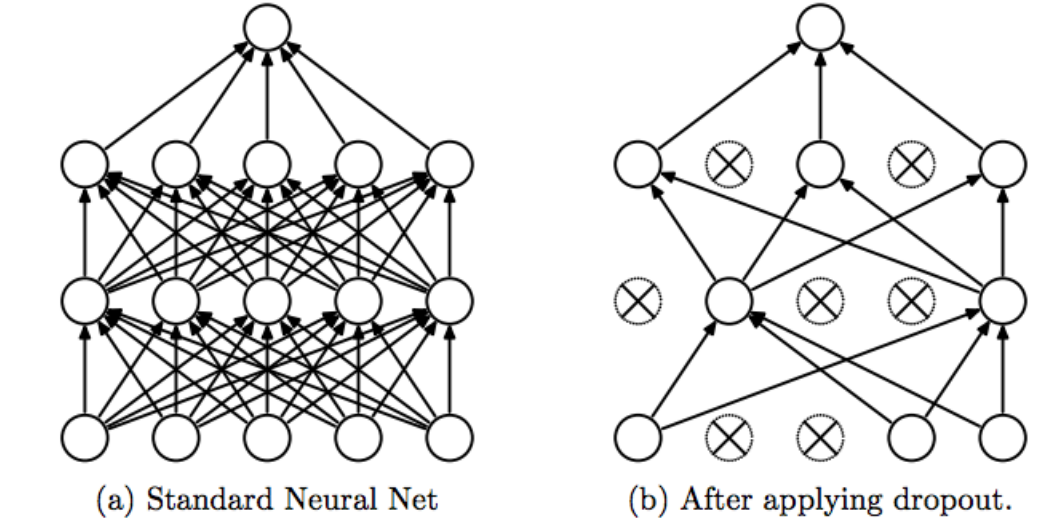

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##Regression Model

###Generate Data

In [11]:
# Training data
X_train = np.linspace(-1, 1, 20).reshape(-1, 1)
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                    -0.2443, -0.02445, 0.00135, -0.2006, 0.07475,
                    -0.1442, 0.06515, 0.15265, 0.3521, 0.28415,
                    0.5524, 0.23115, 0.20835, 0.4211, 0.60485])

In [12]:
# Testing data
X_test = np.linspace(-1, 1, 20).reshape(-1, 1)
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,
                   -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,
                   0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
                   0.3639, 0.5536, 0.3365, 0.50705, 0.33435])

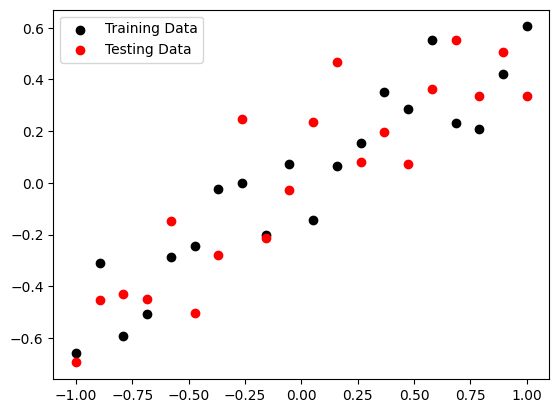

In [13]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.legend()
plt.show()

###Model

In [14]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test)) #verbose=False)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1249 - mse: 0.1249 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0550 - val_mse: 0.0550
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0405 - val_mse: 0.0405
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0173 - mse: 

In [15]:
#evaluate model
#We can esily see the overfitting

_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0036434042267501354, Test: 0.04374294728040695


In [16]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


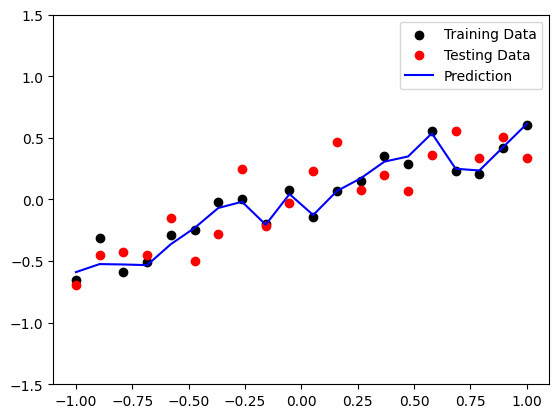

In [17]:
plt.figure()
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_test, y_pred, color='blue', label='Prediction')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

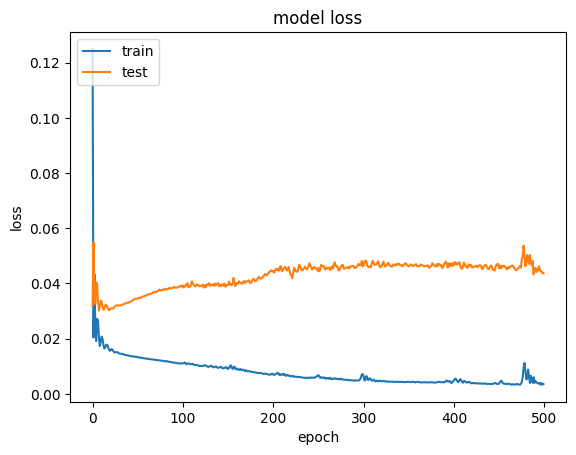

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Dropout Model

In [19]:
model1 = Sequential()

model1.add(Dense(128, input_dim=1, activation='relu'))
model1.add(Dropout(0.2))  # 20% node will be drop in first layer
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))  # 20% node will be drop in second layer
model1.add(Dense(1, activation='linear'))

In [20]:
model2 = Sequential()

model2.add(Dense(128, input_dim=1, activation='relu'))
model2.add(Dropout(0.5))  # 50% node will be drop in first layer
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))  # 50% node will be drop in second layer
model2.add(Dense(1, activation='linear'))

In [21]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='mse', optimizer= adam, metrics=['mse'])
history1 = model1.fit(X_train, y_train, epochs=500, validation_data =(X_test, y_test), verbose=False)

In [22]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='mse', optimizer= adam, metrics=['mse'])
history2 = model2.fit(X_train, y_train, epochs=500, validation_data =(X_test, y_test), verbose=False)

In [23]:
#evaluate model

_, train_mse = model1.evaluate(X_train, y_train)
_, test_mse = model1.evaluate(X_test, y_test)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0136 - mse: 0.0136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0426 - mse: 0.0426
Train: 0.013610152527689934, Test: 0.0426136814057827


In [24]:
#evaluate model

_, train_mse = model2.evaluate(X_train, y_train)
_, test_mse = model2.evaluate(X_test, y_test)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0159 - mse: 0.0159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0362 - mse: 0.0362
Train: 0.015885833650827408, Test: 0.03620830178260803


In [25]:
y_pred1 = model1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [26]:
y_pred2 = model2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


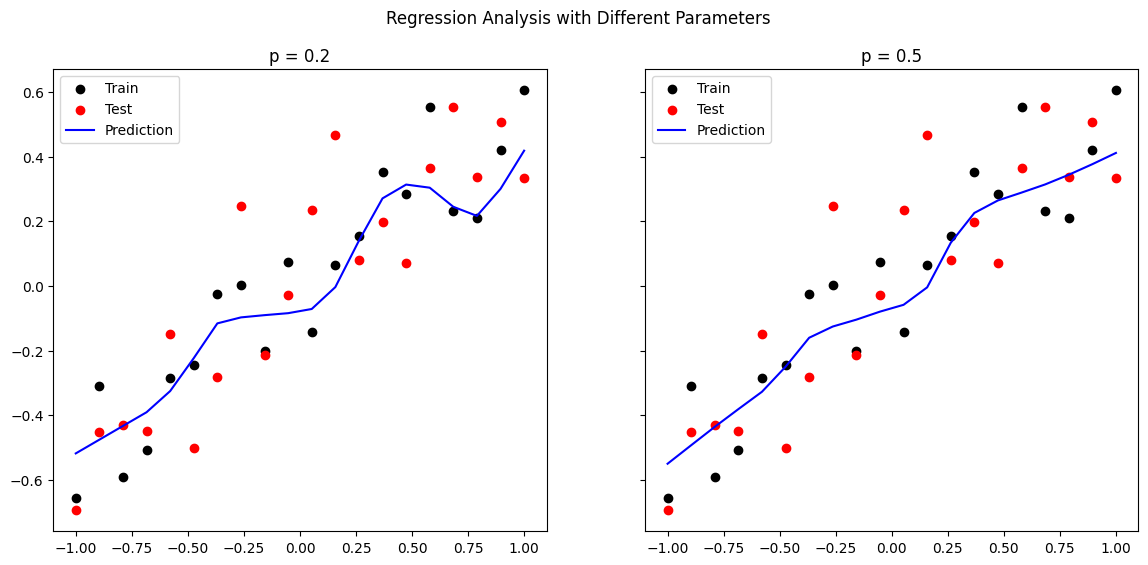

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

ax[0].scatter(X_train, y_train, c='black', label='Train')
ax[0].scatter(X_test, y_test, c='red', label='Test')
ax[0].plot(X_test, y_pred1, c='blue', label='Prediction')
ax[0].set_title('p = 0.2')
ax[0].legend()

ax[1].scatter(X_train, y_train, c='black', label='Train')
ax[1].scatter(X_test, y_test, c='red', label='Test')
ax[1].plot(X_test, y_pred2, c='blue', label='Prediction')
ax[1].set_title('p = 0.5')
ax[1].legend()

plt.suptitle('Regression Analysis with Different Parameters')
plt.show()


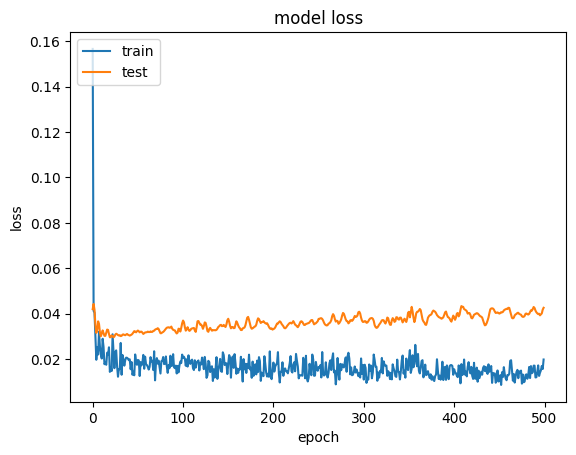

In [28]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

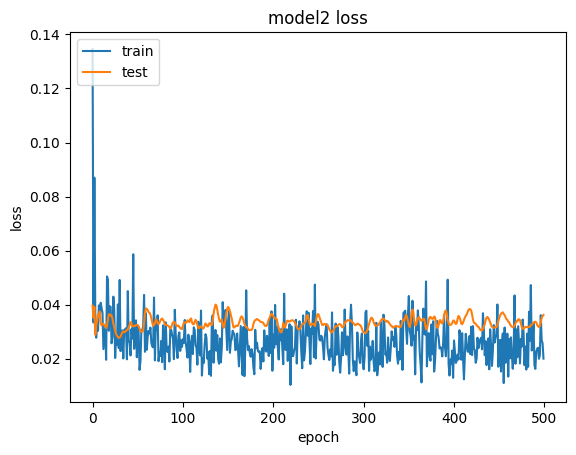

In [29]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Classification Model

In [30]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [31]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

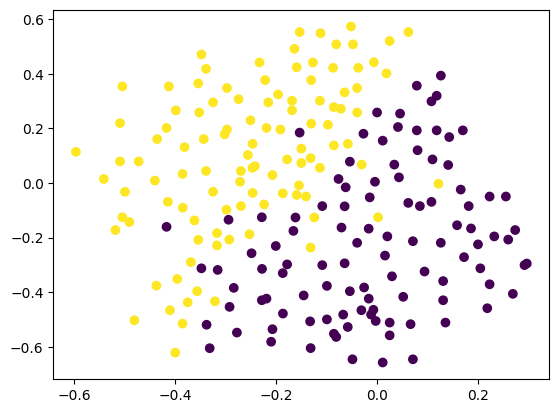

In [32]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [37]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(X, y, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7386 - loss: 0.5922 - val_accuracy: 0.5581 - val_loss: 0.7919
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8583 - loss: 0.2974 - val_accuracy: 0.7209 - val_loss: 0.5689
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8891 - loss: 0.2381 - val_accuracy: 0.8372 - val_loss: 0.4548
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8586 - loss: 0.3044 - val_accuracy: 0.8372 - val_loss: 0.4119
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9434 - loss: 0.2098 - val_accuracy: 0.8372 - val_loss: 0.3598
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9309 - loss: 0.1968 - val_accuracy: 0.8605 - val_loss: 0.3709
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9060 - loss: 0.2500 - val_accuracy: 0.8605 - val_loss: 0.3767
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9359 - loss: 0.1900 - val_accuracy: 0.8605 - val_loss: 0.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

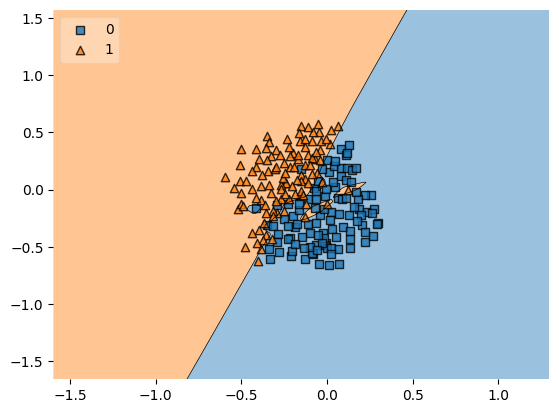

In [39]:
#we can see overfitting
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)

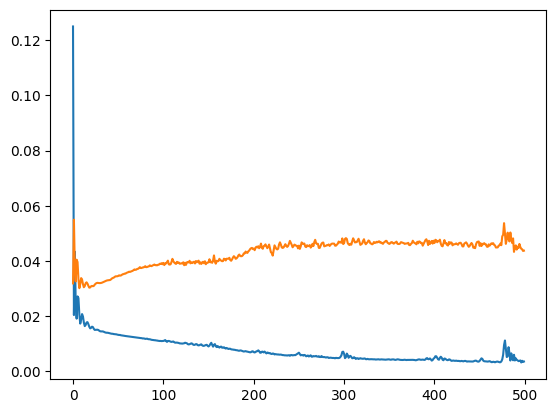

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

###Dropout Model

In [51]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history1 = model1.fit(X, y, epochs=500, validation_split=0.2, verbose=0)

15625/15625 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


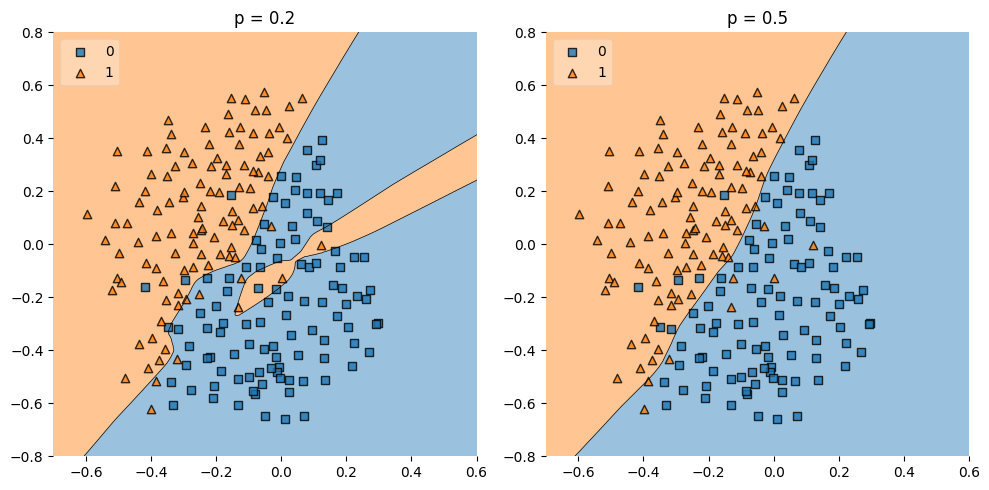

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot for model with p=0.2
plot_decision_regions(X, y.astype('int'), clf=model, legend=2, ax=ax[0])
ax[0].set_xlim(-0.7, 0.6)
ax[0].set_ylim(-0.8, 0.8)
ax[0].set_title('p = 0.2')

# Plot for model1 with p=0.5
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2, ax=ax[1])
ax[1].set_xlim(-0.7, 0.6)
ax[1].set_ylim(-0.8, 0.8)
ax[1].set_title('p = 0.5')

plt.tight_layout()
plt.show()

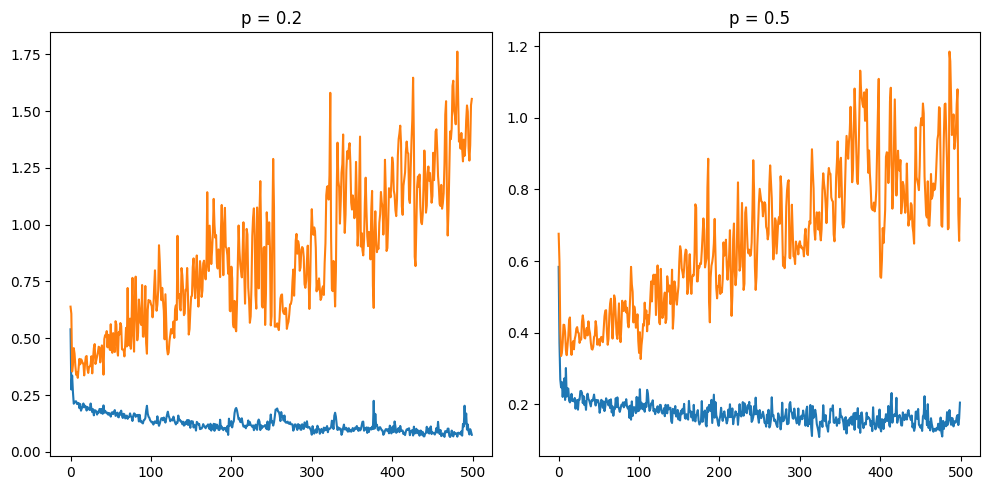

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('p = 0.2')

ax[1].plot(history1.history['loss'])
ax[1].plot(history1.history['val_loss'])
ax[1].set_title('p = 0.5')

plt.tight_layout()
plt.show()

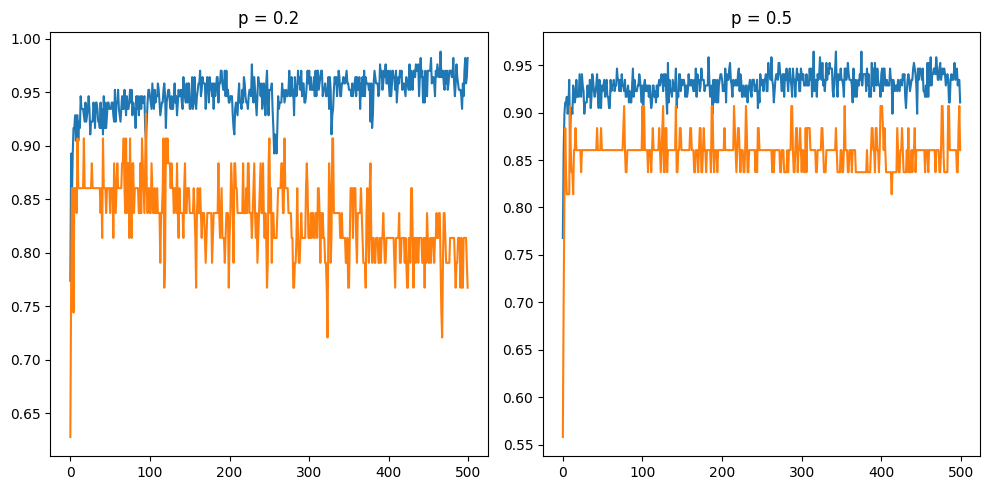

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('p = 0.2')

ax[1].plot(history1.history['accuracy'])
ax[1].plot(history1.history['val_accuracy'])
ax[1].set_title('p = 0.5')

plt.tight_layout()
plt.show()

#Conclusion

In [ ]:
# use dropout at last layer and then try on different layers

In [ ]:
#CNN 40-50% dropout
#RNN 20-30% dropout
#ANN 10-50% dropout